# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df = kill.copy()

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
df.shape

(2535, 14)

In [7]:
df[df.duplicated()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [8]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
df.manner_of_death.value_counts().index

Index(['shot', 'shot and Tasered'], dtype='object')

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

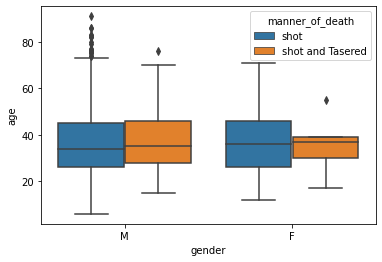

In [12]:
# with seaborn
sns.boxplot(x=df.gender, y=df.age, hue=df.manner_of_death);

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

<AxesSubplot:xlabel='gender', ylabel='age'>

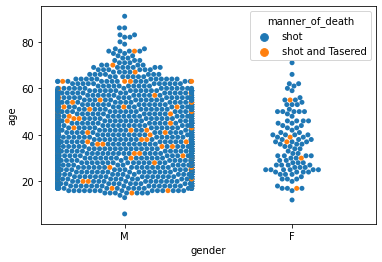

In [13]:
sns.swarmplot(x=df.gender, y=df.age, hue=df.manner_of_death);

## 2: Plot 12 most dangerous cities

In [14]:
df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [69]:
dangerous_cities = df.groupby("city")["id"].agg(np.size).sort_values(ascending = False).head(12)
dangerous_cities

city
Los Angeles     39
Phoenix         31
Houston         27
Chicago         25
Las Vegas       21
San Antonio     20
Columbus        19
Miami           18
Austin          18
St. Louis       15
Albuquerque     14
Indianapolis    14
Name: id, dtype: int64

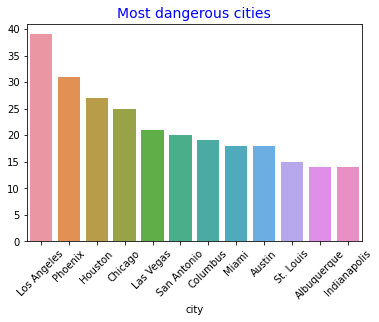

In [70]:
# with seaborn boxplot
sns.barplot(x=dangerous_cities.index, y=dangerous_cities.values);
plt.xticks(rotation=45)
plt.title(label="Most dangerous cities" ,color="b",size=14);

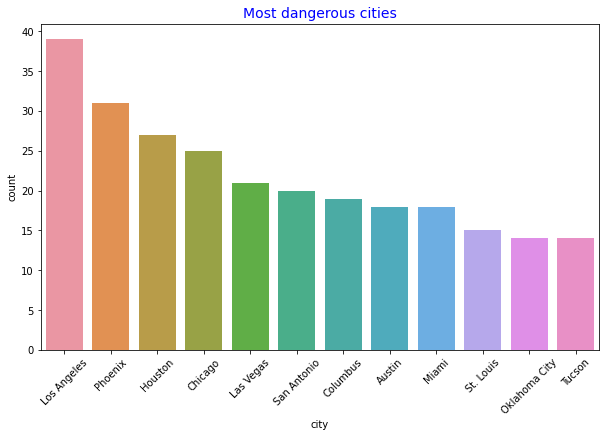

In [57]:
# with seaborn countplot
plt.figure(figsize=(10,6))
sns.countplot(x=df.city, order=df.city.value_counts().iloc[:12].index);
plt.xticks(rotation=45);
plt.title(label="Most dangerous cities" ,color="b",size=14);

## 3: Plot 20 most dangerous states

In [41]:
df.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False


In [43]:
dangerous_state = df.groupby("state")["id"].agg(np.size).sort_values(ascending = False).head(20)
dangerous_state

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
Name: id, dtype: int64

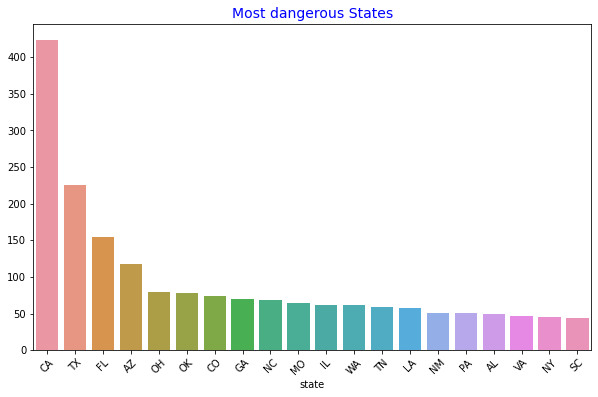

In [58]:
# with seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(x=dangerous_state.index, y=dangerous_state.values);
plt.xticks(rotation=45);
plt.title(label="Most dangerous States" ,color="b",size=14);

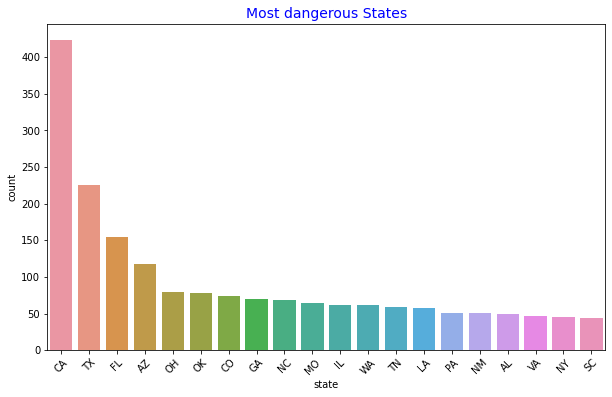

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.state, order=df.state.value_counts().iloc[:20].index);
plt.xticks(rotation=45);
plt.title(label="Most dangerous States" ,color="b",size=14);

## 4: Plot Having mental ilness or not for killed people

In [61]:
df.signs_of_mental_illness.value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

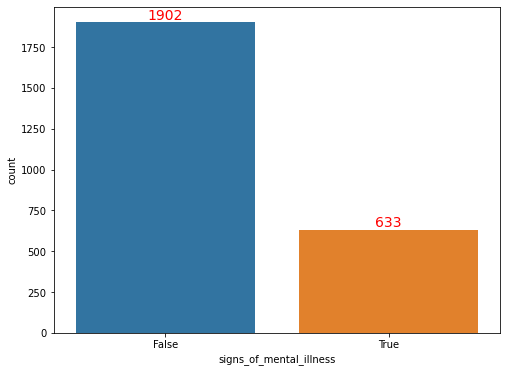

In [66]:
# with seaborn
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df.signs_of_mental_illness);
ax.bar_label(ax.containers[0],size=14, color="red");

## 5: Plot number of Threat Types

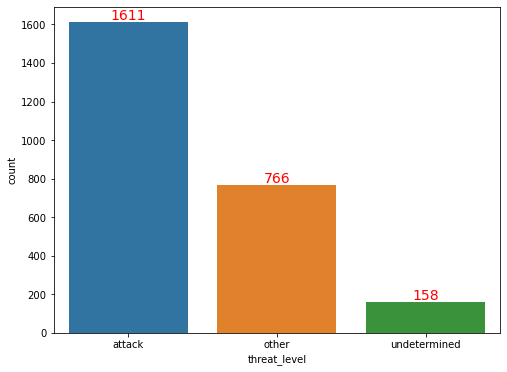

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df.threat_level);
ax.bar_label(ax.containers[0],size=14, color="red");

## 6: Plot number of Flee Types

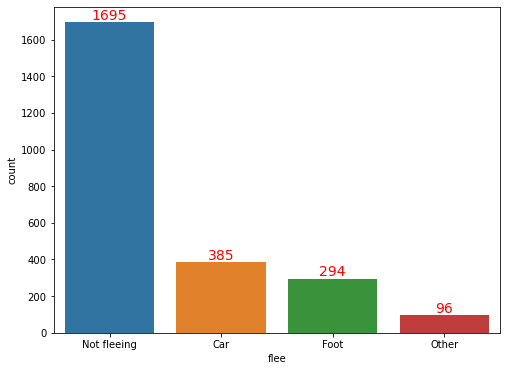

In [68]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df.flee);
ax.bar_label(ax.containers[0],size=14, color="red");